In [39]:
!pip install gensim


In [40]:
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import gensim.downloader
import numpy as np
import pandas as pd

Part 1: Word Embeddings

In [41]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))

[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


In [42]:
dog

array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

Part 1a

In [43]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

cookie = model['cookie']

print(model.most_similar('cookie'))
print(model.similarity('cookie', 'cake'))

[('cookies', 0.7874000668525696), ('cake', 0.7544960379600525), ('baking', 0.69998699426651), ('dough', 0.6928706169128418), ('pie', 0.6830958127975464), ('bake', 0.6623982191085815), ('shortbread', 0.6540555357933044), ('candy', 0.6479902863502502), ('cheesecake', 0.639690101146698), ('biscuit', 0.6372127532958984)]
0.75449616


In [44]:
#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))

[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [45]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)

[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [46]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

gender=model["right"]-model["wrong"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["equal"]+gender)

[('wing', 0.48373129963874817), ('right', 0.479536771774292), ('fibula', 0.46496647596359253), ('tibia', 0.45945635437965393), ('hander', 0.4441920816898346), ('period_4', 0.44066864252090454), ('fielder', 0.4403454065322876), ('lateral', 0.4378201961517334), ('outfielder', 0.43698039650917053), ('autonomy', 0.4345239996910095)]
[('ludicrous', 0.5058995485305786), ('preposterous', 0.4980967044830322), ('skb', 0.4650411307811737), ('inapt', 0.45723408460617065), ('mirsky', 0.45393994450569153), ('potto', 0.4484236240386963), ('godawful', 0.44406136870384216), ('misstates', 0.44324591755867004), ('overselling', 0.44137150049209595), ('3,529', 0.43914979696273804)]


[('equal', 0.832074761390686),
 ('right', 0.6174483895301819),
 ('guaranteed', 0.6129142642021179),
 ('greater', 0.612711489200592),
 ('respect', 0.5859532952308655),
 ('within', 0.5800398588180542),
 ('equality', 0.5776005387306213),
 ('full', 0.5760936737060547),
 ('each', 0.5740699172019958),
 ('form', 0.5730270743370056)]

Part 2: Visualization and Embeddings in Space

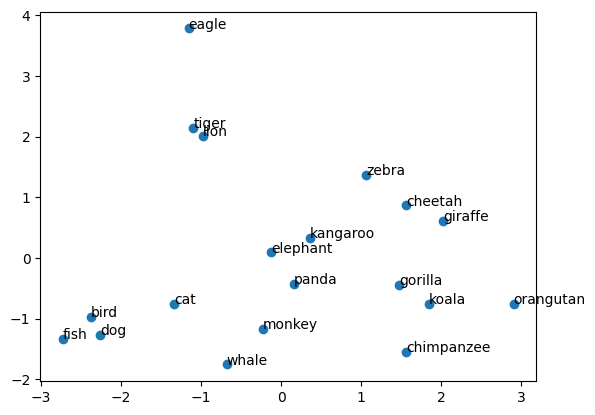

In [47]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

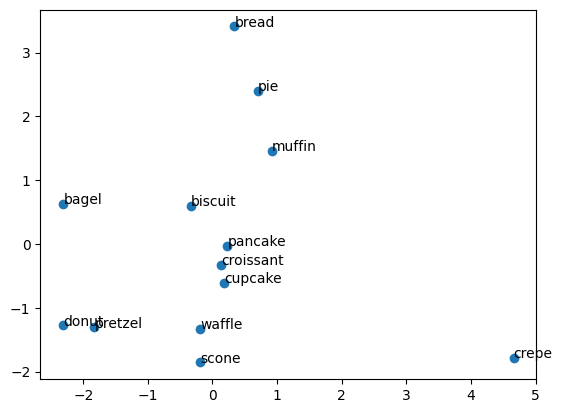

In [48]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=['cupcake','bread','muffin','pie','donut','scone','croissant','bagel','pretzel','biscuit','waffle','pancake','crepe']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

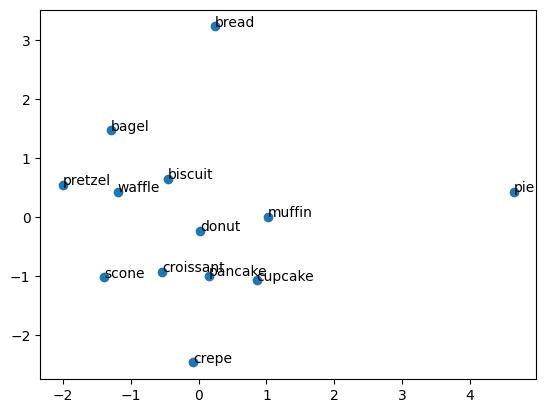

In [49]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
words=['cupcake','bread','muffin','pie','donut','scone','croissant','bagel','pretzel','biscuit','waffle','pancake','crepe']

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Part 3: Embedding reddit posts

In [50]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data



,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,"Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself \n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture",zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to request access?,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,"Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the ""front door"" of the residence hall with access to the dining hall.\n\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.",HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't occurred to me to do that.",Sector-Both,1,1
...,...,...,...,...,...,...,...
1384,1384,2024-08-29 12:20:52,114,"Or Rochester Hills!\n\nI just wanted join in, we’re pretty hilly tho",Throwawaydontgoaway8,9,0
3790,3790,2024-08-15 22:39:48,10,I’ve heard bad things about the IAs for this class,tovarischstalin,0,0
6171,6171,2024-07-21 16:12:21,0,"ROB 102 is equivalent to ENGR101 / EECS 183 so it’ll be redundant for you. I recommend taking ROB 101 in replacement so you can take ROB 204 in winter.\n\nWhat I recommend will vary based on incoming credits, but in general prioritize classes that are required by other classes. For CS / Robotics this generally means EECS 203 & EECS 280 (for EECS 281 / 370), physics 140/240 (for EECS 215, MECH240), math, and stats. The other required classes that aren’t prereqs like chem or IB can be done whenever. \n\nI also recommend taking your math and physics classes at a community college if you aren’t interested in the theory / honors courses. You can do them for cheap at a higher quality than Michigan math classes. In fact, WCC (the community college right beside U-M) currently still has spots for calc 1 remote. Take that then take another requirement like 300 level humanities done at U-M and you’ll have more credits done with less overall workload.",TankerzPvP,2,0
2182,2182,2024-08-26 21:42:03,417,Tell me you know nothing about how endowments work without telling me you know nothing about how endowments work.,FitzwilliamTDarcy,4,0


In [51]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words


<9450x16070 sparse matrix of type '<class 'numpy.int64'>'
	with 223490 stored elements in Compressed Sparse Row format>

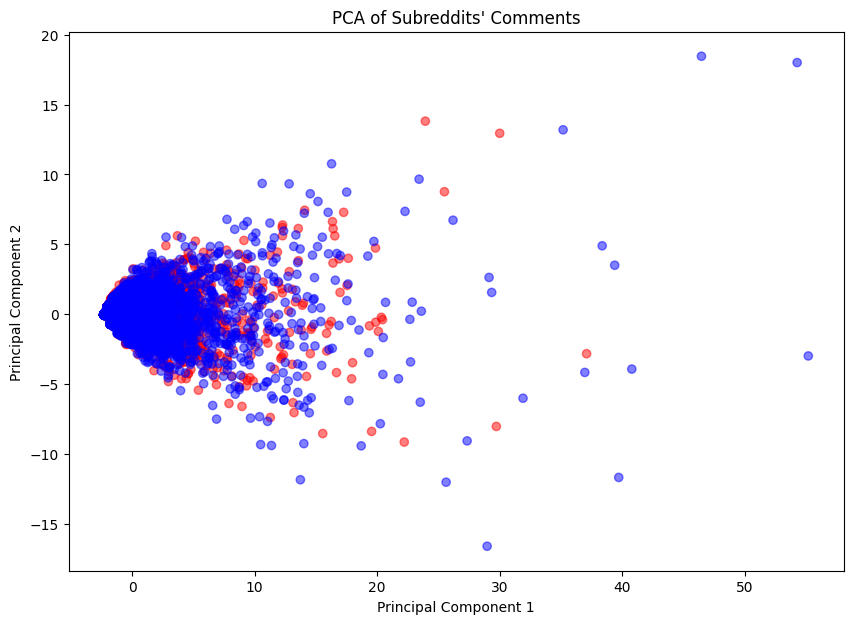

In [52]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.toarray())

colors = ['blue' if label == 0 else 'red' for label in data['label']]

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, alpha=0.5)

plt.title("PCA of Subreddits' Comments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
# is there a clear separation between the two columns? 

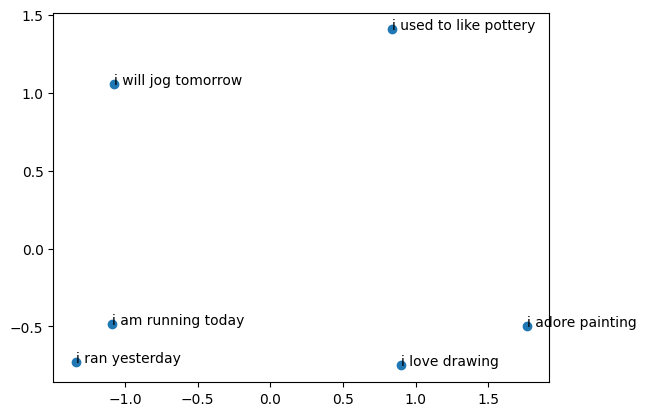

In [53]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

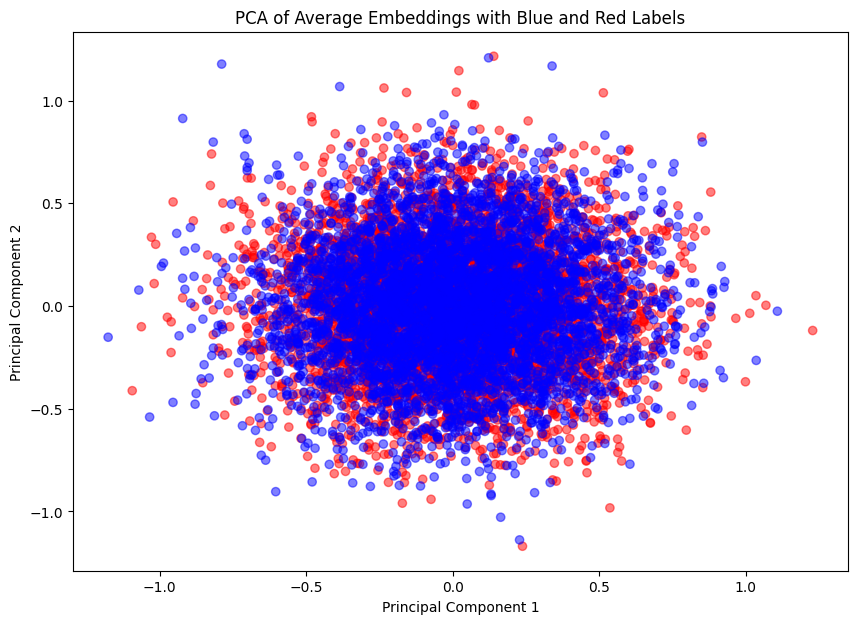

In [54]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column
np.random.seed(0)
avg_embeddings = np.random.rand(len(data), 100)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

plt.figure(figsize=(10, 7))
colors = ['blue' if label == 0 else 'red' for label in data['label']]  # Map labels to colors

plt.scatter(X_pca[:, 0], X_pca[:, 1], color=colors, alpha=0.5)

plt.title("PCA of Average Embeddings with Blue and Red Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#how is this plot different from the previous one?

#is there clear separation? 

Part 4: HuggingFace and BERT

In [55]:
# !pip install transformers
!pip install tf-keras


In [56]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [57]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [58]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

for index, text in enumerate(data['cleaned_text']):
    try:
        result = pipe(text)
        if result and len(result) > 0:
            data.loc[index, 'sentiment'] = result[0]['label']
        else:
            data.loc[index, 'sentiment'] = "UNKNOWN"
    except Exception as e:
        data.loc[index, 'sentiment'] = "ERROR"

print("Length of sentiments:", len(sentiments))
print("Length of data:", len(data))

if len(sentiments) == len(data):
    data['sentiment'] = sentiments
else:
    print("Mismatch in lengths; not adding `sentiment` column.")


uiuc_negative_count = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')].shape[0]
michigan_negative_count = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')].shape[0]

print("\nNegative sentiment count in UIUC subreddit:", uiuc_negative_count)
print("Negative sentiment count in Michigan subreddit:", michigan_negative_count)

Token indices sequence length is longer than the specified maximum sequence length for this model (235 > 128). Running this sequence through the model will result in indexing errors


Length of sentiments: 0
Length of data: 12108
Mismatch in lengths; not adding `sentiment` column.

Negative sentiment count in UIUC subreddit: 1023
Negative sentiment count in Michigan subreddit: 1075


In [59]:
#look at ten sample posts and labels; do you agree with all of them? 

Looking at the samples, I think many sample that are marked as negative seems more neutral, and some neutral commants are likely to be positive. For example, I would consider " That’s awesome to know. Wishing you many more years of success and happiness. :)" as a positive reply, but it's being marked as neutral. 

In [60]:
pd.set_option('display.max_colwidth', None)
sample_posts = data[['text', 'sentiment']].sample(10)
print("Sample posts and their sentiments with full text:")
print(sample_posts)

Sample posts and their sentiments with full text:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text  \
250   LMAO Vienna and Berlin are genocidal countries? The US house literally condemned its use. Hamas logic folks, their slogans support genocide.\n\nLiterally the origin of its slogan was from terrorist orgs, which called for the destruction of israel and kill of jews. And its been used in the same context largely, ever since no matter how much you try to excuse it.\n\nIt's mind boggling how you people are somehow saying otherwise. Batshit insane and disgusting.   
3439    

In [61]:
#is the UIUC or Michigan subreddit more negative?

The Michigan subreddit is more negative.